# test data for house prices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# changing directory to where test dataset is located. this should be same time with the train dataset

In [2]:
import os
os.chdir('d:/dataset')
test_df =pd.read_csv('house_prices/test.csv')

In [3]:
test_df.shape # number of rows and columns

(1459, 80)

In [4]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# number of columns alone

In [5]:
print(test_df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# grouping by years they were sold

In [6]:
print(test_df.groupby('YrSold').size())

YrSold
2006    305
2007    363
2008    318
2009    309
2010    164
dtype: int64


# data wrangling

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [8]:
test_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

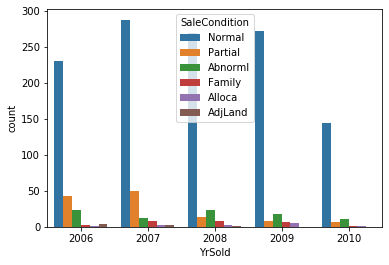

In [9]:
sns.countplot(x="YrSold", hue="SaleCondition",data=test_df)

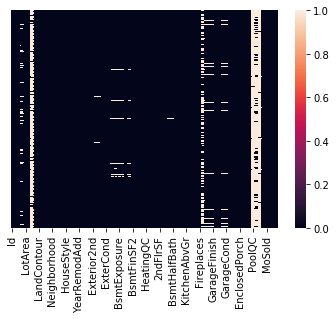

In [10]:
sns.heatmap(test_df.isnull(), yticklabels=False)

# value_count()s is used to count how types an object is

In [11]:
test_df['MSZoning'].value_counts()  # 5 types

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

# filling missing values with the mean or mode of each row

In [12]:
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())
test_df['MSZoning'] = test_df['MSZoning'].fillna(test_df['MSZoning'].mode(0))   # has string value

In [13]:
test_df['LotFrontage']

0        80.000000
1        81.000000
2        74.000000
3        78.000000
4        43.000000
5        75.000000
6        68.580357
7        63.000000
8        85.000000
9        70.000000
10       26.000000
11       21.000000
12       21.000000
13       24.000000
14       24.000000
15      102.000000
16       94.000000
17       90.000000
18       79.000000
19      110.000000
20      105.000000
21       41.000000
22      100.000000
23       43.000000
24       67.000000
25       63.000000
26       60.000000
27       73.000000
28       92.000000
29       84.000000
           ...    
1429     50.000000
1430     75.000000
1431     69.000000
1432     50.000000
1433     60.000000
1434     41.000000
1435     44.000000
1436     69.000000
1437     65.000000
1438     70.000000
1439    140.000000
1440     68.580357
1441     68.580357
1442     95.000000
1443     88.000000
1444    125.000000
1445     78.000000
1446     41.000000
1447     58.000000
1448     68.580357
1449     21.000000
1450     21.

In [14]:
test_df.drop(['Alley'] ,axis =1 ,inplace = True)

In [15]:
test_df.shape

(1459, 79)

In [16]:
test_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [17]:
test_df['MSZoning'] = test_df['MSZoning'].fillna(test_df['MSZoning'].mode(0))
test_df['Utilities'] = test_df['Utilities'].fillna(test_df['Utilities'].mode(0))
test_df['Exterior1st'] = test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode(0))
test_df['Exterior2nd'] = test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode(0))
test_df['MasVnrType'] = test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode(0))
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mode(0))

test_df['KitchenQual'] = test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode(0))
test_df['Functional'] = test_df['Functional'].fillna(test_df['Functional'].mode(0))
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode(0))
test_df['GarageType'] = test_df['GarageType'].fillna(test_df['GarageType'].mode(0))
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mode(0))

test_df['GarageFinish'] = test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode(0))

test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].mean(0))
test_df['GarageQual'] = test_df['GarageQual'].fillna(test_df['GarageQual'].mode(0))
test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df['GarageCars'].mean())


test_df['SaleType'] = test_df['SaleType'].fillna(test_df['SaleType'].mode(0))
test_df['PoolQC'] = test_df['PoolQC'].fillna(test_df['PoolQC'].mode(0))
test_df['Fence'] = test_df['Fence'].fillna(test_df['Fence'].mode(0))
test_df['MiscFeature'] = test_df['MiscFeature'].fillna(test_df['MiscFeature'].mode(0))


In [18]:
test_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          0
GarageArea          0
GarageQual         78
GarageCond

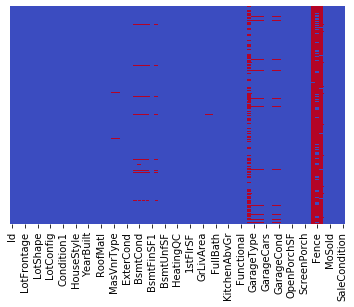

In [19]:
sns.heatmap(test_df.isnull() ,yticklabels =False ,cbar=False ,cmap ='coolwarm')

In [20]:
test_df['MSZoning'] = test_df['MSZoning'].fillna(test_df['MSZoning'].mode(0))

In [21]:
test_df['SaleType'] = test_df['SaleType'].fillna(test_df['SaleType'].mode(0))

In [22]:
test_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          0
GarageArea          0
GarageQual         78
GarageCond